<a href="https://colab.research.google.com/github/valenderval/MLA_JFV/blob/main/MLA2_JFV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 2
Jacob Vallery <br>CS430-ON <br>MachineLearning in the Cloud

#Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for specific models

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Imports for Splitting Data and Building Pipeline

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


#Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#Confusion Matrix Function

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 1

#Linear Regression - Acquire Data

In [47]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

Renaming the columns.

In [48]:
columns = df.columns.tolist()
print(columns)

['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_of_week', 'Load_Type']


In [49]:
df.rename(columns={'Usage_kWh': 'usage_kwh'}, inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh'}, inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor': 'lag_current_pwr'}, inplace=True)
df.rename(columns={'Leading_Current_Power_Factor': 'lead_current_pwr'}, inplace=True)
df.rename(columns={'NSM': 'nsm'}, inplace=True)
df.rename(columns={'WeekStatus': 'week_status'}, inplace=True)
df.rename(columns={'Day_of_week': 'day_of_week'}, inplace=True)
df.rename(columns={'Load_Type': 'load_type'}, inplace=True)

In [50]:
columns = df.columns.tolist()
print(columns)

['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']


#Statistical and Visual Exploration

In [51]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [52]:
print(df['load_type'].value_counts())

load_type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


In [53]:
load_type_counts = df['load_type'].value_counts()
print(load_type_counts)

load_type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


Text(0, 0.5, 'Number of Days')

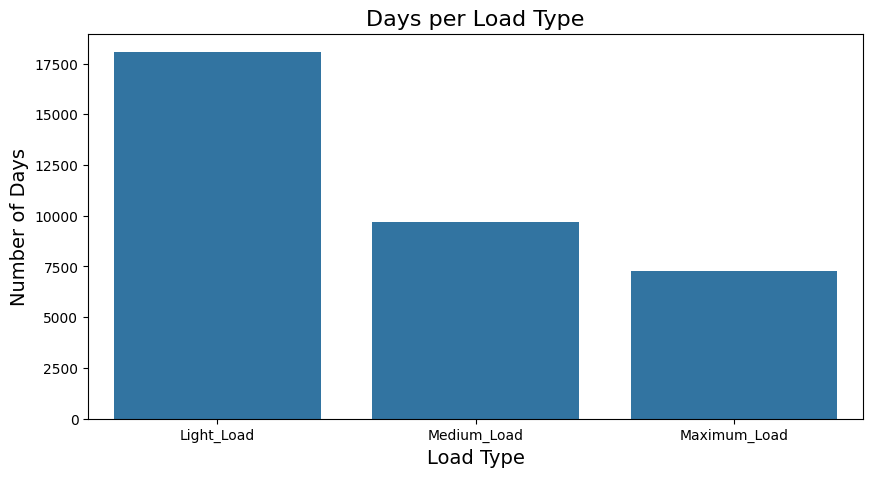

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x=load_type_counts.index, y=load_type_counts.values)
plt.title('Days per Load Type', fontsize=16)
plt.xlabel('Load Type', fontsize=14)
plt.ylabel('Number of Days', fontsize=14)

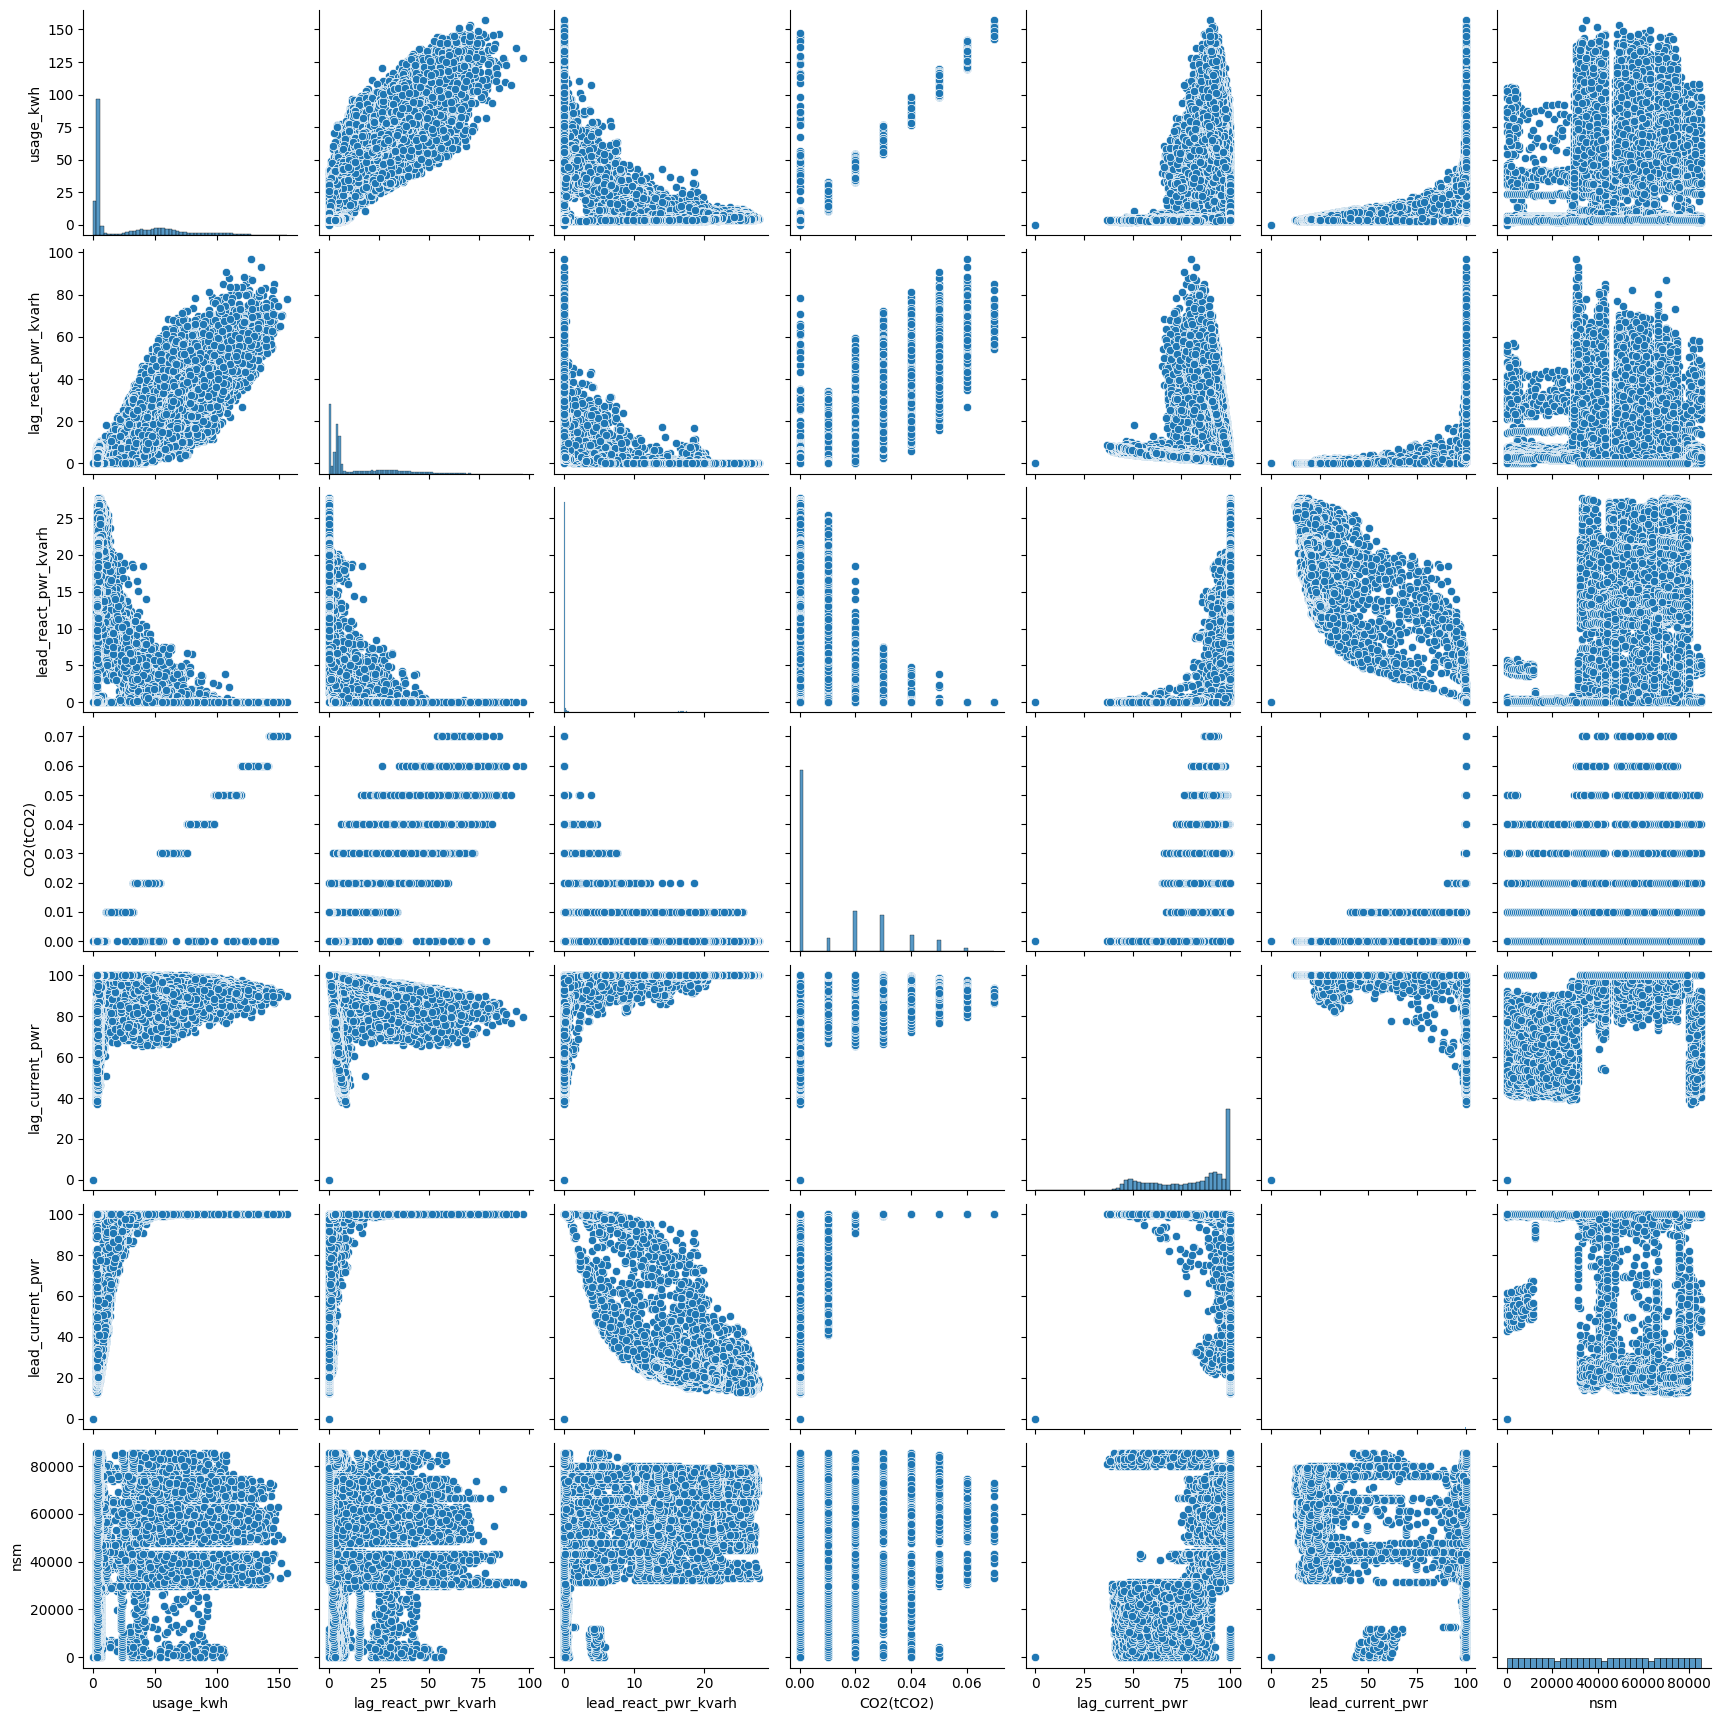

In [55]:
sns.pairplot(df)
plt.show()

Many of these represent a linear regression relationship, usage_kwh seems to exhibit this relationship most frequently. CO2 and lag_current_pwr also have few of these relationships.

#Splitting Data into Train/Test

In [56]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [57]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [59]:
print(X_train.columns)

Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status',
       'day_of_week', 'load_type'],
      dtype='object')


#Building the Pipeline

In [60]:
X.head(1)

,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load


In [61]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

In [62]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough'

                  )

In [63]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('mlr_model', LinearRegression()),
])

In [64]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr'])])),
                ('mlr_model', LinearRegression())])

#Executing the Model

In [65]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr'])])),
                ('mlr_model', LinearRegression())])

#Evaluating Model

In [66]:
y_pred = pipeline.predict(X_test)

In [67]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Root mean squared error:

In [69]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))

4.58047212739725


In [70]:
print(mean_squared_error(y_test, y_test_pred)**(0.5))

5.049417919349892


This shows that the model is consistent. Both test and train RSME are similar.

R-squared value:

In [71]:
r2_score(y_pred, y_test)

0.9762771266271192

From this we see that, the model captures about 97% of the variation.

In [72]:
pipeline.named_steps['mlr_model'].intercept_

np.float64(-4.554198834425179)

In [73]:
pipeline.named_steps['mlr_model'].coef_

array([ 2.89284682e-03, -2.89284674e-03, -1.37889633e-01, -1.13841616e-01,
       -1.24404701e-01,  1.21511854e-01, -1.66436073e-01,  4.53213656e-01,
       -3.21534869e-02, -9.50998238e-01,  2.83976832e-01,  6.67021405e-01,
        2.90610730e+01,  1.97809923e+00,  1.17574454e+02,  6.94709545e+00,
        4.80847435e+00, -3.14731353e-06])

#Conclusion

The linear regression relationship was observed in the pairplot, influencing the creation of this model to test against usage_kwh. Given the R-squared and root mean squared error results, this model is suitable for predicting kwh usage.

#Problem 2

#Logistic Regression - Acquire Data

In [74]:
df['week_status'] = df['week_status'].replace({'Weekday': 1, 'Weekend': 0})

<ipython-input-74-b979de52ac4b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_status'] = df['week_status'].replace({'Weekday': 1, 'Weekend': 0})


#Splitting Data into Train/Test

In [75]:
X = df.drop(columns=['date', 'week_status','day_of_week'])
y = df['week_status']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

#Building the Pipeline

In [77]:
df.head(1)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,1,Monday,Light_Load


In [78]:
num_attribs = ['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs = ['load_type']

In [79]:
col_transform = ColumnTransformer(transformers=[
                               ('cat',OneHotEncoder(), cat_attribs),
                               ('num',MinMaxScaler(), num_attribs)],
                               remainder='passthrough'

                  )

In [80]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('mlr', LogisticRegression(max_iter=1000)),
                     ])

In [81]:
from sklearn import set_config
set_config(display='diagram')

#Executing the Model

In [82]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

#Evaluating Model

In [83]:
y_pred = pipeline.predict(X_test)

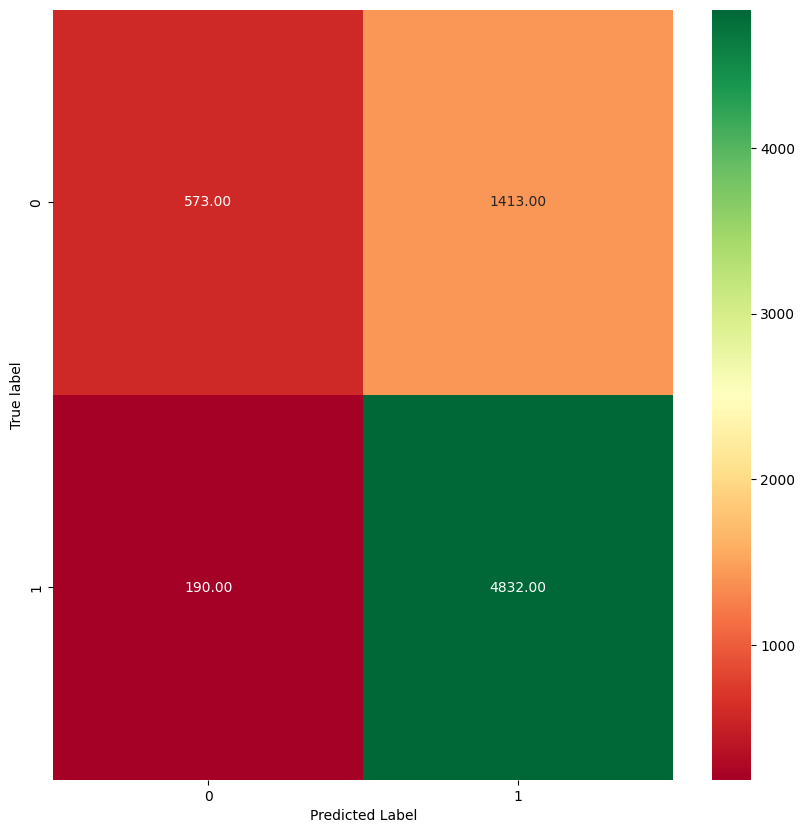

In [84]:
plot_cm(y_test,y_pred)

In [85]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7737389911929544
0.9621664675428117
0.8577261027780243


The results of all three are relatively high, but the recall is higher than the precision here. This means that the model is more permissive for classyfying instances as positive. This model is good at predicting positive instances correctly, but even better at just finging positive instances. The F1 score tells me that there is a good balance between precision and recall.

ROC curve:

0.7720400830504892


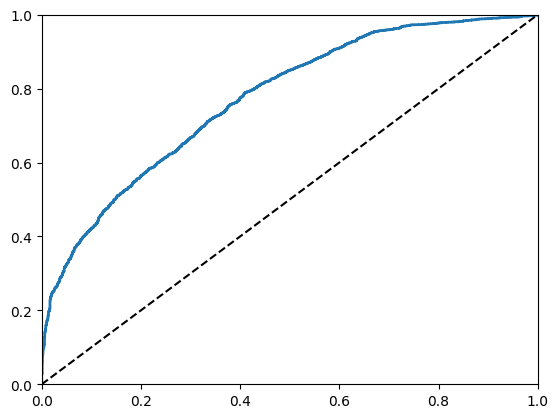

In [86]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

With a value at 0.7720400830504892, this reaches a good classification, meaning this model is performing well, but could be improved. I chose this ROC curve because of how well it matches the precision score, both are at about 77%.

#Conclusion

 This model is good for predicting week_status. More often than not it chooses correclty, however it could still be improved.